In [ ]:
# @title Leonal Robin

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [ ]:
# @title Enseble model- stacking method using knn neighbour & naive bayes

In [12]:
df = pd.read_csv('case.csv')    # loading the dataset
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [13]:
# Creating X and y for training
X = df.drop('Cover_Type', axis = 1)
y = df['Cover_Type']

In [14]:
# 20 % training dataset is considered for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
# initializing sc object
sc = StandardScaler()
# variables that needed to be transformed
var_transform = ['Elevation',
'Aspect',
'Slope',
'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways']
X_train[var_transform] = sc.fit_transform(X_train[var_transform])   # standardizing training data
X_test[var_transform] = sc.transform(X_test[var_transform])            # standardizing test data
print(X_train.head())

          Id  Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
4679    4680  -0.931922 -1.393533  1.603661                          0.853167   
6634    6635   0.317969 -0.859090 -0.767255                          0.665904   
11459  11460   0.532305  0.046745 -0.174526                         -0.568107   
15053  15054  -0.857265  1.740656  1.840753                         -0.630527   
8222    8223   1.187354 -0.840974  0.536749                         -0.568107   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
4679                         1.668287                        -0.458791   
6634                         0.003210                        -0.772459   
11459                       -0.507854                         1.864008   
15053                       -0.392452                        -0.834892   
8222                        -0.425424                         0.604822   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type3

In [16]:
KNC = KNeighborsClassifier()   # initialising KNeighbors Classifier
NB = GaussianNB()              # initialising Naive Bayes

In [17]:
model_kNeighborsClassifier = KNC.fit(X_train, y_train)   # fitting Training Set
pred_knc = model_kNeighborsClassifier.predict(X_test)   # Predicting on test dataset

In [18]:
acc_knc = accuracy_score(y_test, pred_knc)  # evaluating accuracy score
print('accuracy score of KNeighbors Classifier is:', acc_knc * 100)

accuracy score of KNeighbors Classifier is: 66.07142857142857


In [19]:
lr = LogisticRegression() # defining meta-classifier
clf_stack = StackingClassifier(classifiers =[KNC, NB], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_stack = LogisticRegression(max_iter=1000)
model_stack = clf_stack.fit(X_train_scaled, y_train)
pred_stack = model_stack.pred
ict(X_test_scaled)


In [9]:
acc_stack = accuracy_score(y_test, pred_stack) # evaluating accuracy
print('accuracy score of Stacked model:', acc_stack * 100)
conf_matrix_stk = confusion_matrix(y_test, pred_stack)
print("Confusion Matrix:")
print(conf_matrix_stk)
precision_stack = precision_score(y_test, pred_stack, average='weighted')
recall_stack = recall_score(y_test, pred_stack, average='weighted')

print('Precision score of Stacked model:', precision_stack)
print('Recall score of Stacked model:', recall_stack)


accuracy score of Stacked model: 30.125661375661377
Confusion Matrix:
[[ 41  73  85  41  17  39 125]
 [ 29 140  51  54  28  26 110]
 [ 21   6 146 124  28  53  50]
 [  0   3  85 251  60  27  23]
 [ 41  50  53  98  66  33  75]
 [ 24  14 137  75  36  80  66]
 [ 50  42  86  30  31  14 187]]
Precision score of Stacked model: 0.2959755394644056
Recall score of Stacked model: 0.3012566137566138


In [ ]:
# @title Ensemble model- Bagging model using random forest

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Load data
df = pd.read_csv("/content/forest_cover_dataset.csv")
target = df["Cover_Type"]
train = df.drop("Cover_Type", axis=1)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.20)

# RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
pred_rf = rf_classifier.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy*100)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 86.07804232804233
Confusion Matrix:
[[302  62   0   0   6   1  26]
 [ 80 307   7   0  33   6   2]
 [  0   1 339  18   4  54   0]
 [  0   0   6 439   0   6   0]
 [  0  14   7   0 408   6   0]
 [  0   5  40  12   4 394   0]
 [ 21   0   0   0   0   0 414]]


In [ ]:
# @title ROC and AUC curve for Bagging method

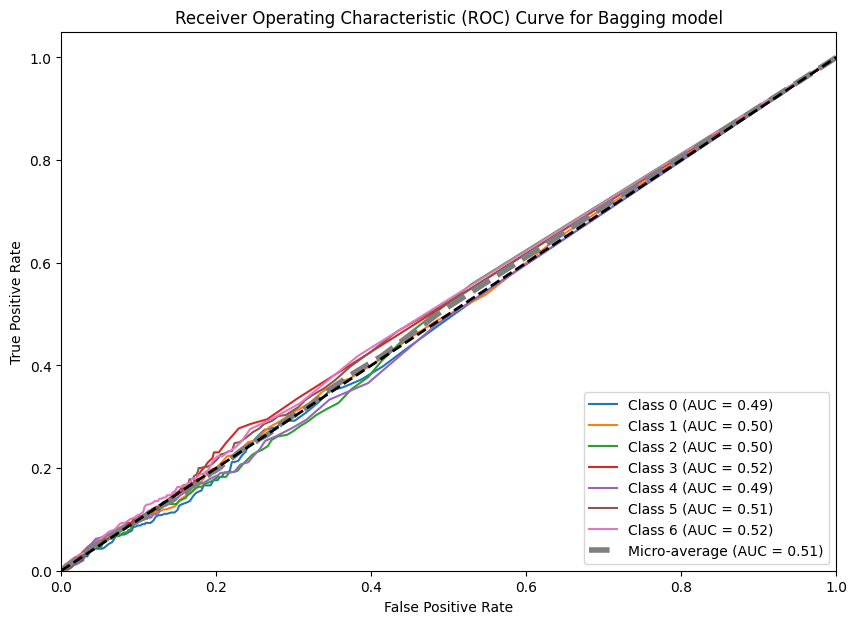

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np


# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(rf_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == rf_classifier.classes_[i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(pd.get_dummies(y_test)).ravel(), y_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 7))

for i in range(len(rf_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], label='Micro-average (AUC = {0:0.2f})'.format(roc_auc["micro"]), linestyle='--', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Bagging model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# @title ROC & AUC curve for Ensemble - stacking classifier

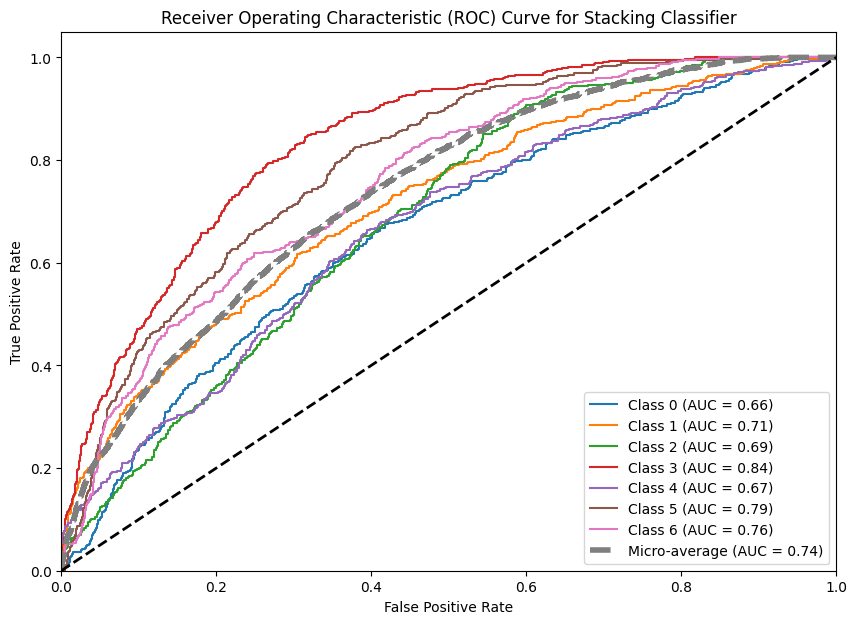

In [34]:

from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Compute ROC curve and AUC for each class
fpr_stack = dict()
tpr_stack = dict()
roc_auc_stack = dict()

for i in range(len(model_stack.classes_)):
    fpr_stack[i], tpr_stack[i], _ = roc_curve(y_test == model_stack.classes_[i], y_probs_stack[:, i])
    roc_auc_stack[i] = auc(fpr_stack[i], tpr_stack[i])

# Micro-average ROC curve and AUC
fpr_stack["micro"], tpr_stack["micro"], _ = roc_curve(np.array(pd.get_dummies(y_test)).ravel(), y_probs_stack.ravel())
roc_auc_stack["micro"] = auc(fpr_stack["micro"], tpr_stack["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 7))

for i in range(len(model_stack.classes_)):
    plt.plot(fpr_stack[i], tpr_stack[i], label=f'Class {i} (AUC = {roc_auc_stack[i]:.2f})')

plt.plot(fpr_stack["micro"], tpr_stack["micro"],
         label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_stack["micro"]), linestyle='--', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Stacking Classifier')
plt.legend(loc="lower right")
plt.show()




In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
# Load data
df = pd.read_csv("/content/forest_cover_dataset.csv")
target = df["Cover_Type"]
train = df.drop("Cover_Type", axis=1)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.20)

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Hyperparameters:")
print(best_params)

# Make predictions with the best model
pred_rf = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy*100)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:")
print(conf_matrix)
precision_stack = precision_score(y_test, pred_stack, average='weighted')
recall_stack = recall_score(y_test, pred_stack, average='weighted')

print('Precision score of Stacked model:', precision_stack)
print('Recall score of Stacked model:', recall_stack)

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 86.70634920634922
Confusion Matrix:
[[323  66   1   0  12   0  26]
 [ 82 294   8   0  28   9   3]
 [  0   3 346  19   6  47   0]
 [  0   0   5 421   0   5   0]
 [  0  16   9   0 415   7   0]
 [  0   1  34   4   3 395   0]
 [  6   2   0   0   0   0 428]]
Precision score of Stacked model: 0.1328750718545055
Recall score of Stacked model: 0.1378968253968254


In [ ]:
# @title Stacking method - knn and naive bias classifier

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
# Load data
df = pd.read_csv("/content/forest_cover_dataset.csv")

# Creating X and y for training
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# 20% training dataset is considered for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing sc object
sc = StandardScaler()

# Variables that need to be transformed
var_transform = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']

X_train[var_transform] = sc.fit_transform(X_train[var_transform])   # Standardizing training data
X_test[var_transform] = sc.transform(X_test[var_transform])        # Standardizing test data

# KNeighborsClassifier
KNC = KNeighborsClassifier()   # Initializing KNeighbors Classifier

# Hyperparameter tuning for KNeighborsClassifier
param_grid_knc = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree']
}

grid_search_knc = GridSearchCV(estimator=KNC, param_grid=param_grid_knc, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knc.fit(X_train, y_train)

best_params_knc = grid_search_knc.best_params_
best_model_knc = grid_search_knc.best_estimator_

# Naive Bayes
NB = GaussianNB()              # Initializing Naive Bayes

# Logistic Regression
lr = LogisticRegression()      # Initializing Logistic Regression

# Stacking Classifier
clf_stack = StackingClassifier(estimators=[('knc', best_model_knc), ('nb', NB)], final_estimator=lr, stack_method='predict_proba', passthrough=True)

# Fit the Stacking Classifier
model_stack = clf_stack.fit(X_train, y_train)

# Predictions and Evaluation
pred_stack = model_stack.predict(X_test)
acc_stack = accuracy_score(y_test, pred_stack)  # Evaluating accuracy score
print('Accuracy score of Stacked model:', acc_stack * 100)

conf_matrix_stk = confusion_matrix(y_test, pred_stack)
print("Confusion Matrix:")
print(conf_matrix_stk)

precision_stack = precision_score(y_test, pred_stack, average='weighted')
recall_stack = recall_score(y_test, pred_stack, average='weighted')

print('Precision score of Stacked model:', precision_stack)
print('Recall score of Stacked model:', recall_stack)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of Stacked model: 30.125661375661377
Confusion Matrix:
[[ 41  73  85  41  17  39 125]
 [ 29 140  51  54  28  26 110]
 [ 21   6 146 124  28  53  50]
 [  0   3  85 251  60  27  23]
 [ 41  50  53  98  66  33  75]
 [ 24  14 137  75  36  80  66]
 [ 50  42  86  30  31  14 187]]
Precision score of Stacked model: 0.2959755394644056
Recall score of Stacked model: 0.3012566137566138


In [15]:
# @title give 2 more classifier for stacking method - RandomForestClassifier, GradientBoostingClassifier

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Add more classifiers
RF = RandomForestClassifier()
GB = GradientBoostingClassifier()

# Load data
df = pd.read_csv("/content/forest_cover_dataset.csv")

# Creating X and y for training
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# 20% training dataset is considered for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing sc object
sc = StandardScaler()

# Variables that need to be transformed
var_transform = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']

X_train[var_transform] = sc.fit_transform(X_train[var_transform])   # Standardizing training data
X_test[var_transform] = sc.transform(X_test[var_transform])        # Standardizing test data

# KNeighborsClassifier
KNC = KNeighborsClassifier()   # Initializing KNeighbors Classifier
# random forest
RF = RandomForestClassifier()
#gradient boosting
GB = GradientBoostingClassifier()
# Hyperparameter tuning for KNeighborsClassifier
param_grid_knc = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knc = GridSearchCV(estimator=KNC, param_grid=param_grid_knc, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knc.fit(X_train, y_train)

best_params_knc = grid_search_knc.best_params_
best_model_knc = grid_search_knc.best_estimator_

# Naive Bayes
NB = GaussianNB()              # Initializing Naive Bayes

# Logistic Regression
lr = LogisticRegression()      # Initializing Logistic Regression

# Stacking Classifier
clf_stack = StackingClassifier(
    estimators=[('knc', KNC), ('nb', NB), ('rf', RF), ('gb', GB)],
    final_estimator=lr,  # Use final_estimator instead of meta_classifier
    stack_method='auto',  # Choose the stacking method, 'auto' uses predict_proba if available, otherwise decision_function
    passthrough=True,  # Use passthrough to allow raw data to be passed to the final_estimator
    cv=5,  # Specify the number of cross-validation folds
)
# Fit the Stacking Classifier
model_stack = clf_stack.fit(X_train, y_train)

# Predictions and Evaluation
pred_stack = model_stack.predict(X_test)
acc_stack = accuracy_score(y_test, pred_stack)  # Evaluating accuracy score
print('Accuracy score of Stacked model:', acc_stack * 100)

conf_matrix_stk = confusion_matrix(y_test, pred_stack)
print("Confusion Matrix:")
print(conf_matrix_stk)

precision_stack = precision_score(y_test, pred_stack, average='weighted')
recall_stack = recall_score(y_test, pred_stack, average='weighted')

print('Precision score of Stacked model:', precision_stack)
print('Recall score of Stacked model:', recall_stack)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of Stacked model: 29.629629629629626
Confusion Matrix:
[[ 33  75  76  42  24  48 123]
 [ 19 123  39  56  55  38 108]
 [ 17   9 131 133  19  63  56]
 [  0   3  84 254  58  26  24]
 [ 26  45  50 103  79  34  79]
 [ 26  11 114  84  35  94  68]
 [ 48  48  76  33  32  21 182]]
Precision score of Stacked model: 0.2887540220082339
Recall score of Stacked model: 0.2962962962962963


In [ ]:
# @title Karthie krishna